In [127]:
# Loading the Libraries, Preprocessing, and algorithms
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn import metrics
from scipy import stats
from scipy import stats
from scipy.stats import zscore, loguniform
from scipy.stats.mstats import winsorize

sns.set_style("whitegrid")

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data 
df = pd.read_csv('salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Checking relevant information of the data
print(df.info())
print("******************")
print("The shape of the dataset is ", df.shape)
print("******************")
print("Missing Values")
print(df.isnull().sum())
print("******************")
print("There is", df.duplicated().sum(), "duplicate")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
******************
The shape of the dataset is  (32561, 15)
******************
Missing V

In [4]:
# Remove duplicates, and check again
df.drop_duplicates(keep='first', inplace=True)
print(df.info())
print("******************")
print("The shape of the dataset is ", df.shape)
print("******************")
print("Missing Values")
print(df.isnull().sum())
print("******************")
print("There is", df.duplicated().sum(), "duplicate")

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB
None
******************
The shape of the dataset is  (32537, 15)
******************
Missing Values

In [5]:
# Checking for their unique values and value count to know my dataset
unique_number=[]
for i in df.columns:
    x=df[i].value_counts().count()
    unique_number.append(x)
pd.DataFrame(unique_number,columns=['Unique Number'], index=df.columns)
    

,Unique Number
age,73
workclass,9
fnlwgt,21648
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [6]:
## Let's check the labels in the categorical features

for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

native-country
[' United-States' ' Cuba' ' Jamaica' ' 

- workclass, occupation, and native-country all have ?

In [7]:
df.workclass.value_counts()

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [8]:
df.occupation.value_counts()

occupation
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: count, dtype: int64

In [9]:
df['native-country'].value_counts()

native-country
 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [10]:
# Replace the ? with nan and extra spaces

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df.replace('?', np.nan, inplace=True)

In [11]:
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex
['Male' 'Female']

native-country
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' '

In [12]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
salary               0
dtype: int64

In [13]:
# Checking the columns with nan
df[df['workclass'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


* missing values are over 1k+, and they include useful information for better prediction. removing the missing values or replacing them with their mode won't make the model better, instead we keep the data, replacing em with another variable

In [14]:
df.occupation.fillna(value = 'others_1', inplace=True)
df.workclass.fillna(value = 'others_2', inplace=True)
df['native-country'].fillna(value = 'others_3', inplace=True)

In [15]:
for cols in df.columns:
    if df[cols].dtype=='object':
        print()
        print(cols)
        print(df[cols].unique())
        


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'others_2' 'Self-emp-inc' 'Without-pay' 'Never-worked']

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'others_1'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex
['Male' 'Female']

native-country
['United-States' 'Cuba' 'Jamaica' 'India' 'others_3' 'Mexico' 'South'
 'Puerto-Rico' '

In [16]:
# Some country names are not spelt right.
df['native-country'] = df['native-country'].replace(["Holand-Netherlands","Trinadad&Tobago", "Hong", "South"],
                                                        ['Netherlands',"Trinidad and Tobago", "Hong Kong", "South Korea"])

In [17]:
df['native-country'].value_counts()

native-country
United-States                 29153
Mexico                          639
others_3                        582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South Korea                      80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

## EDA

In [18]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


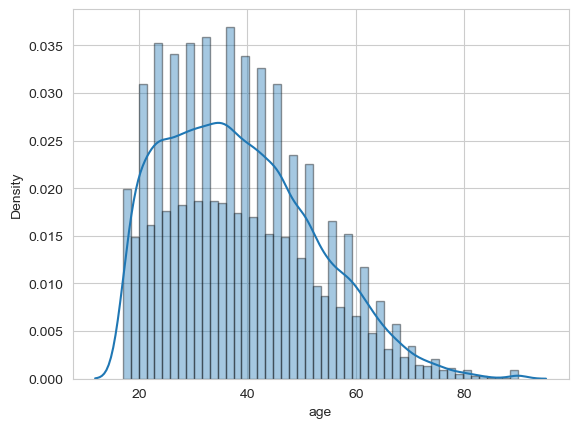

In [19]:
sns.distplot(df['age'],hist_kws=dict(linewidth=1,edgecolor='k'));

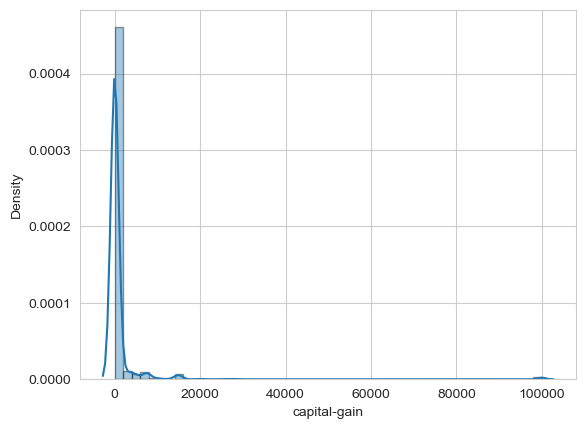

In [20]:
sns.distplot(df['capital-gain'],hist_kws=dict(linewidth=1,edgecolor='k'));

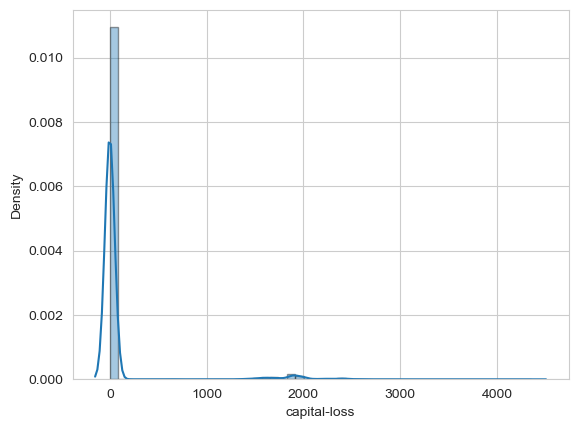

In [21]:
sns.distplot(df['capital-loss'],hist_kws=dict(linewidth=1,edgecolor='k'));

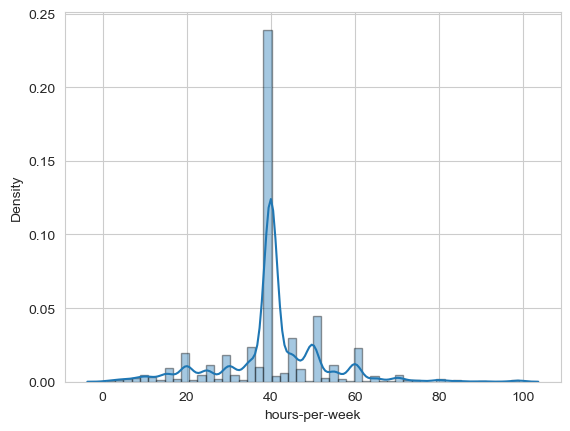

In [22]:
sns.distplot(df['hours-per-week'],hist_kws=dict(linewidth=1,edgecolor='k'));

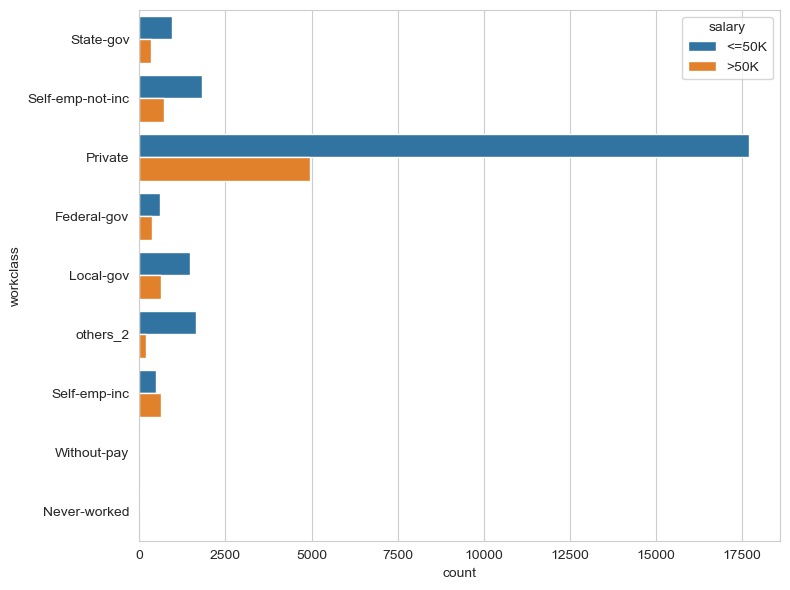

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='workclass', hue = 'salary')
plt.tight_layout()
plt.show()

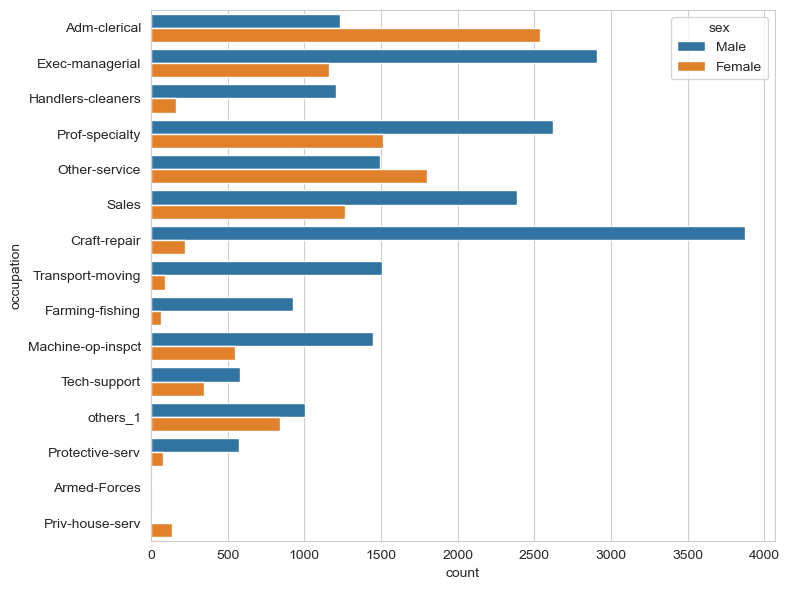

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='occupation', hue =  'sex')
plt.tight_layout()
plt.show()

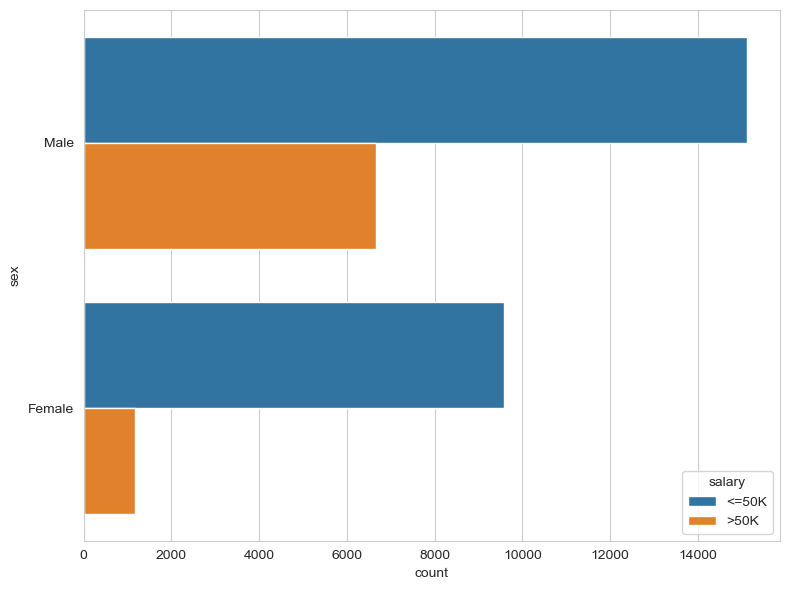

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='sex', hue = 'salary')
plt.tight_layout()
plt.show()

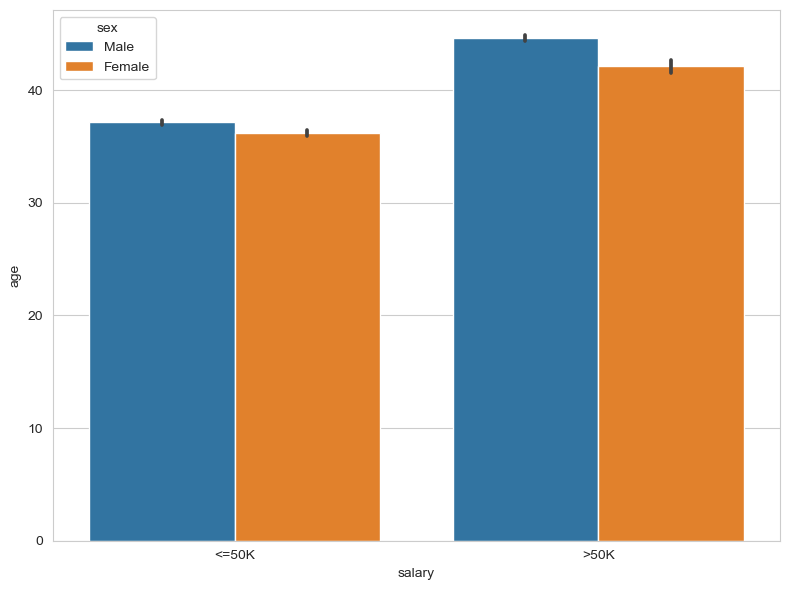

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='salary', y='age', hue = 'sex')
plt.tight_layout()
plt.show()

- due to the unique count in native-country, we should classify the countries in two groups. USA have the highest number of count in the data, the rest ain't up to half of USA.

In [27]:

USA = df[df['native-country'] == 'United-States']
others = df[df['native-country'] != 'USA']


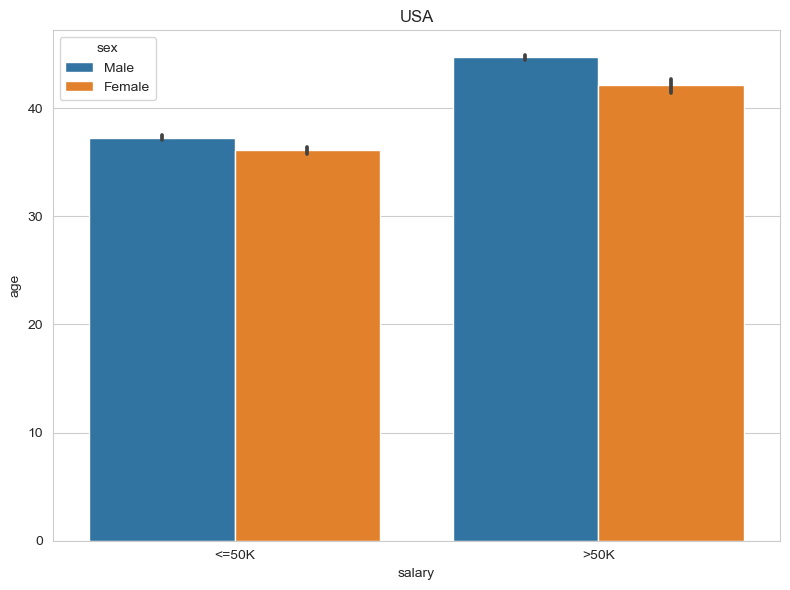

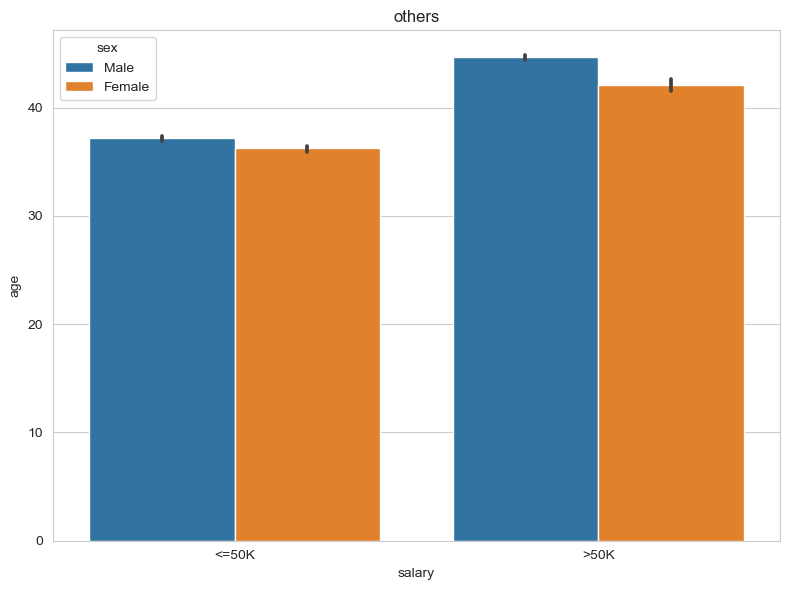

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(data=USA, x='salary', y='age', hue = 'sex')
plt.title('USA')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(data= others, x='salary', y='age', hue = 'sex')
plt.title('others')
plt.tight_layout()
plt.show()

In [29]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


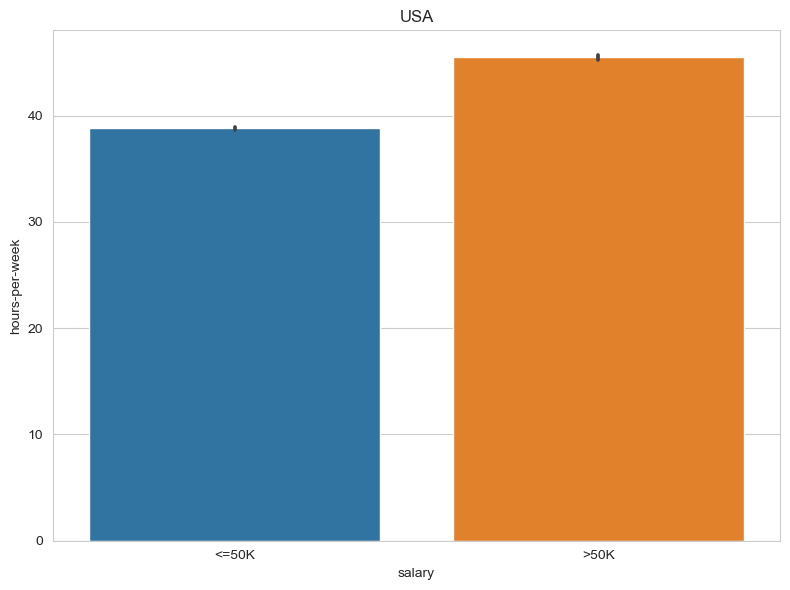

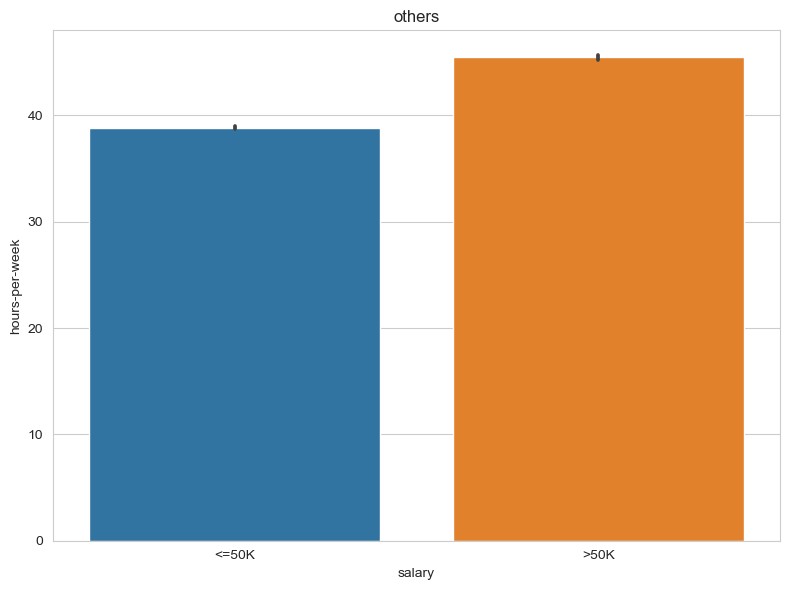

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(data=USA, x='salary', y='hours-per-week')
plt.title('USA')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(data=others, x='salary', y='hours-per-week')
plt.title('others')
plt.tight_layout()
plt.show()


- the more your hour of work, the higher your pay in the USA

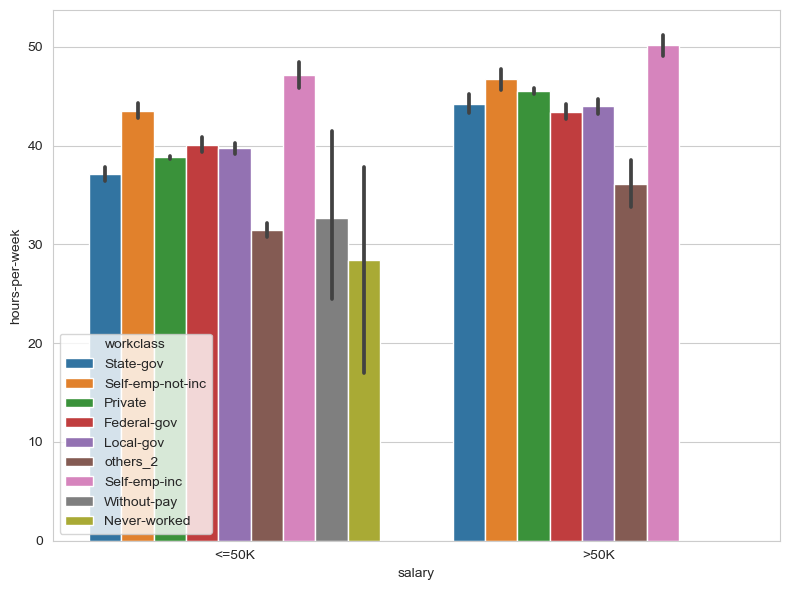

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='salary', y='hours-per-week', hue = 'workclass')
plt.tight_layout()
plt.show()

- those who work more hours have higher salary
- those who are self-employed earn more irrespective of their working hour

In [32]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
# Grouping the features into numerical & categorical 

numerical_df = df[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']] 
categorical_df = df[['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'salary']]

In [34]:


numerical_axis = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_axis = ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'salary']

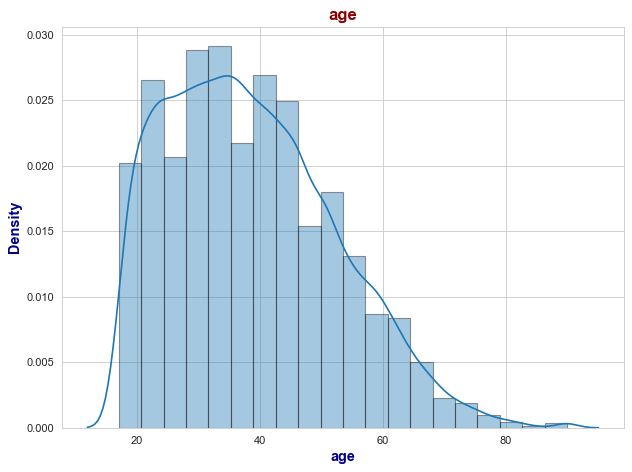

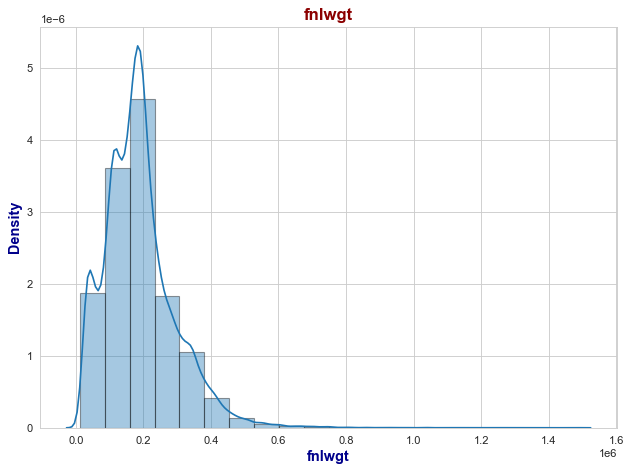

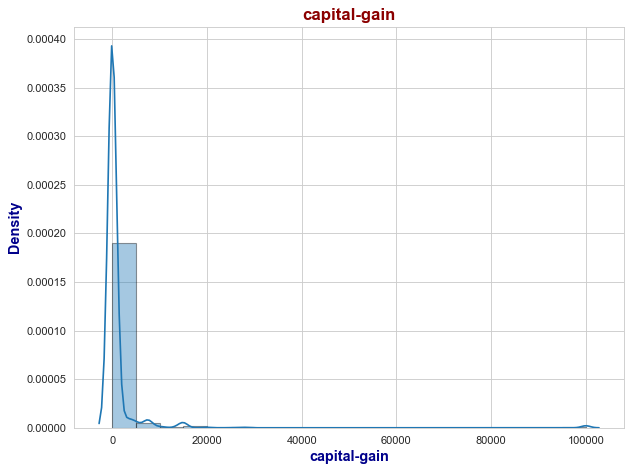

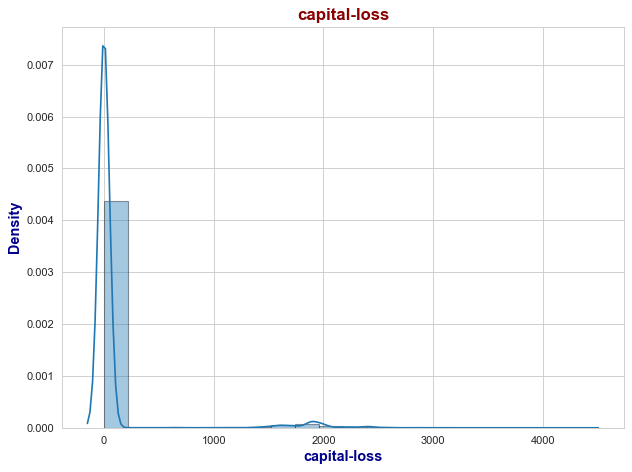

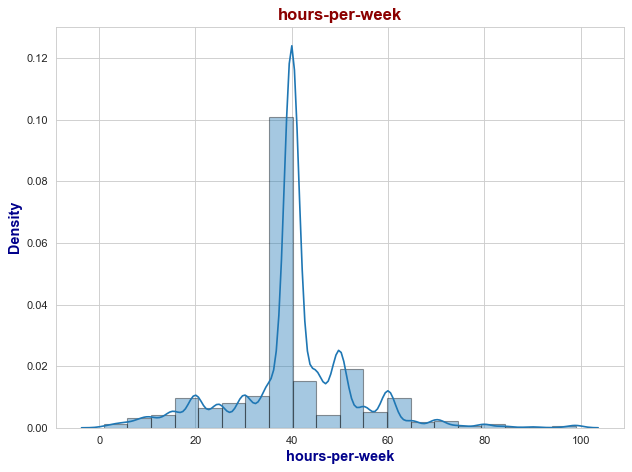

In [35]:
title_font={'family': 'arial', 'color': 'darkred', 'weight': 'bold', 'size': 15}
axis_font={'family': 'arial', 'color': 'darkblue', 'weight': 'bold', 'size': 13}

for i, z in list(zip(numerical_df, numerical_axis)):
    plt.figure(figsize=(8,6),dpi=80)
    sns.distplot(df[i],hist_kws=dict(linewidth=1,edgecolor='k'),bins=20)
    plt.title(i,fontdict=title_font)
    plt.xlabel(z,fontdict=axis_font)
    plt.ylabel('Density',fontdict=axis_font)
    plt.tight_layout()
    plt.show()

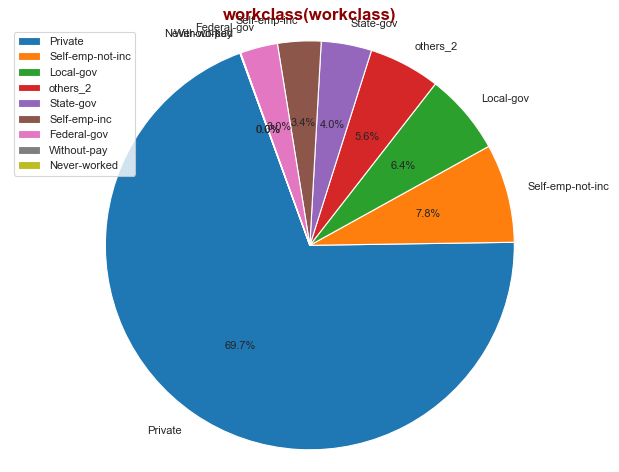

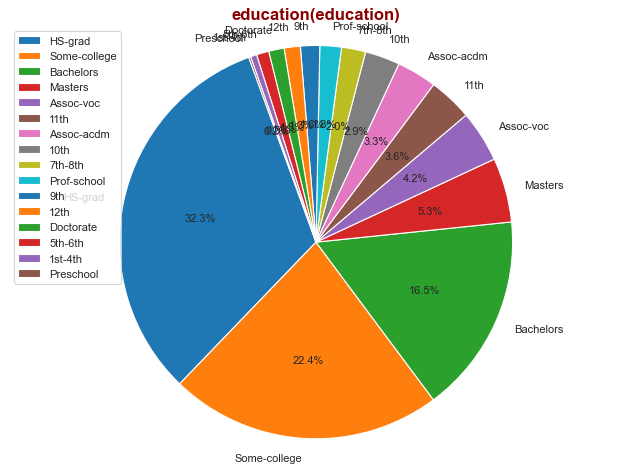

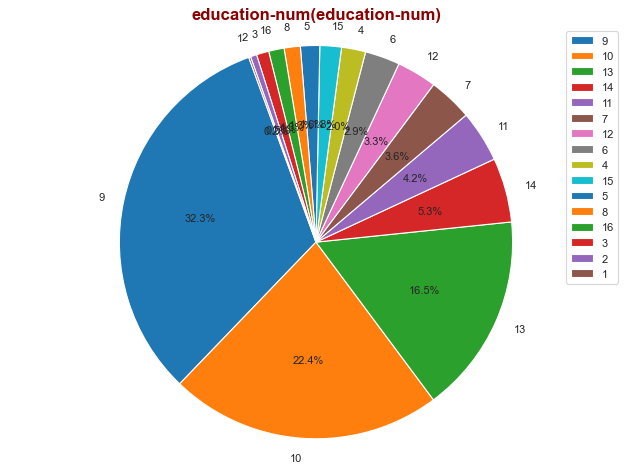

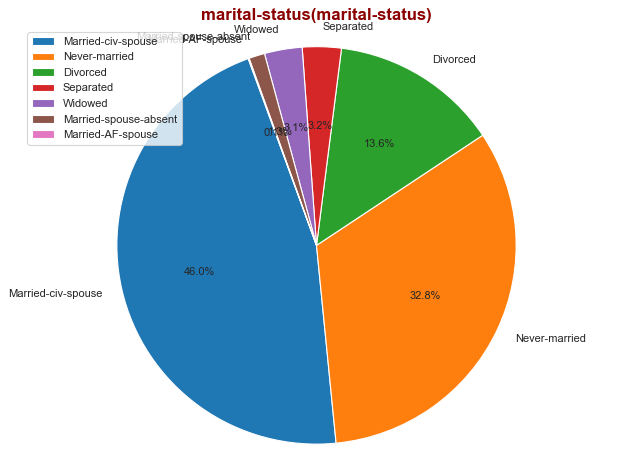

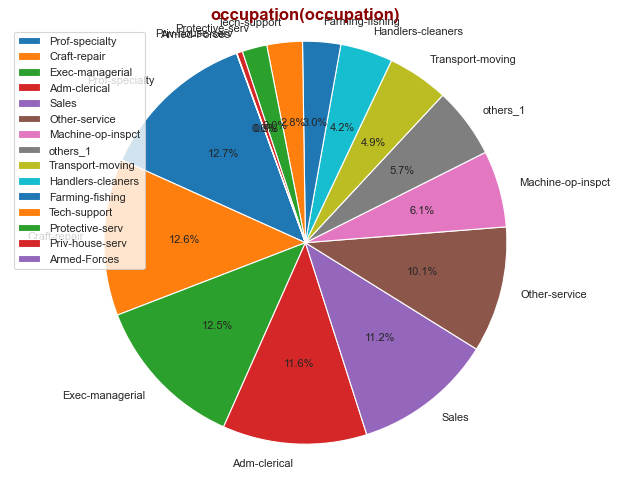

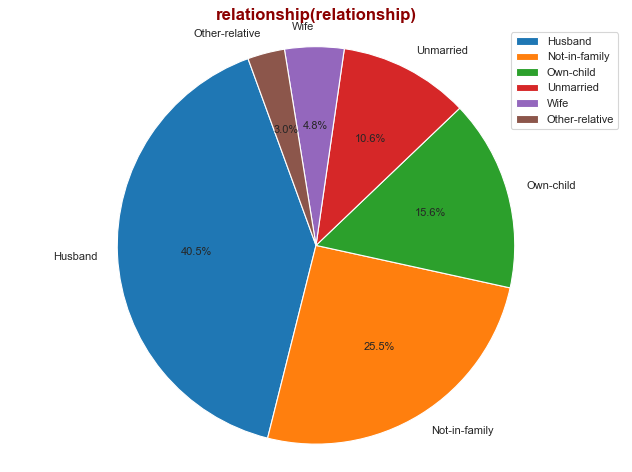

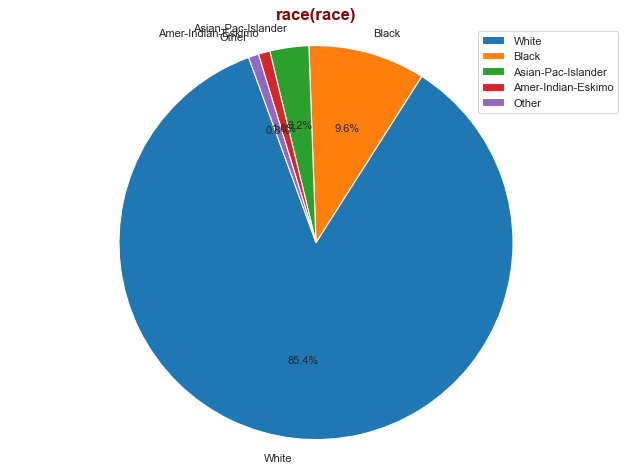

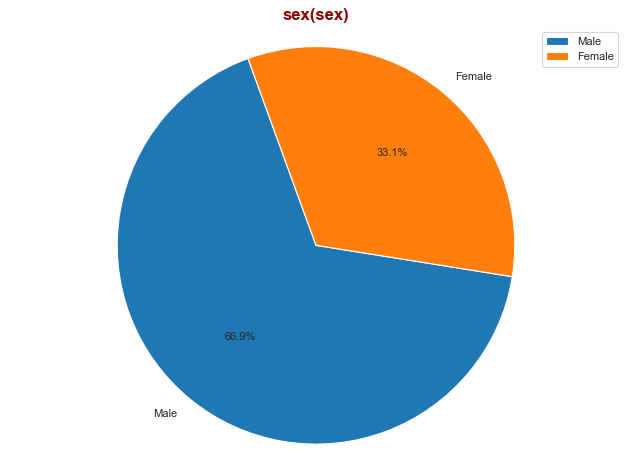

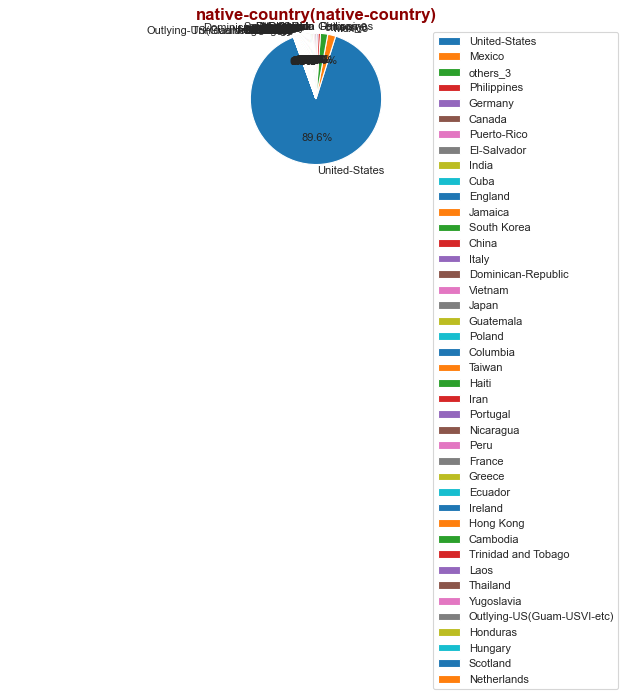

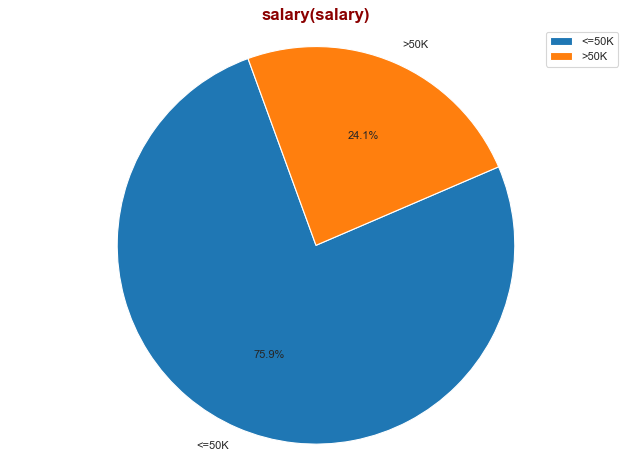

In [36]:
title_font={'family': 'arial', 'color': 'darkred', 'weight': 'bold', 'size': 15}
axis_font={'family': 'arial', 'color': 'darkblue', 'weight': 'bold', 'size': 13}

for i, z in list(zip(categorical_df, categorical_axis)):
    fig,ax = plt.subplots(figsize=(8,6),dpi=80)
    
    observation_values=list(df[i].value_counts().index)
    total_observation = list(df[i].value_counts())
    
    ax.pie(total_observation,labels=observation_values, autopct='%1.1f%%',startangle=110, labeldistance=1.1)
    ax.axis('equal')
    
    plt.title((i +'('+ z+ ')'), fontdict=title_font)
    plt.legend()
    plt.tight_layout()
    plt.show()

## Preprocessing

## Outliers

In [37]:
numerical_df.columns

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

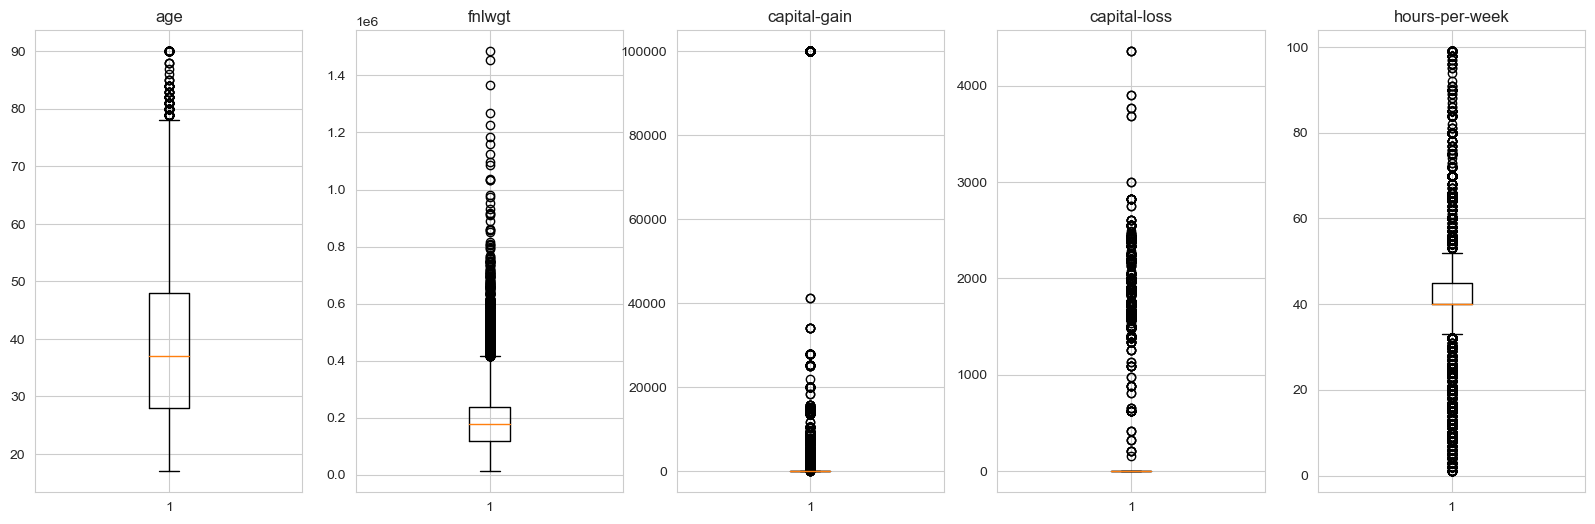

In [38]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(20,6))

ax1.boxplot(df['age'])
ax1.set_title('age')

ax2.boxplot(df['fnlwgt'])
ax2.set_title('fnlwgt')

ax3.boxplot(df['capital-gain'])
ax3.set_title('capital-gain')

ax4.boxplot(df['capital-loss'])
ax4.set_title('capital-loss')

ax5.boxplot(df['hours-per-week'])
ax5.set_title('hours-per-week')
plt.show()

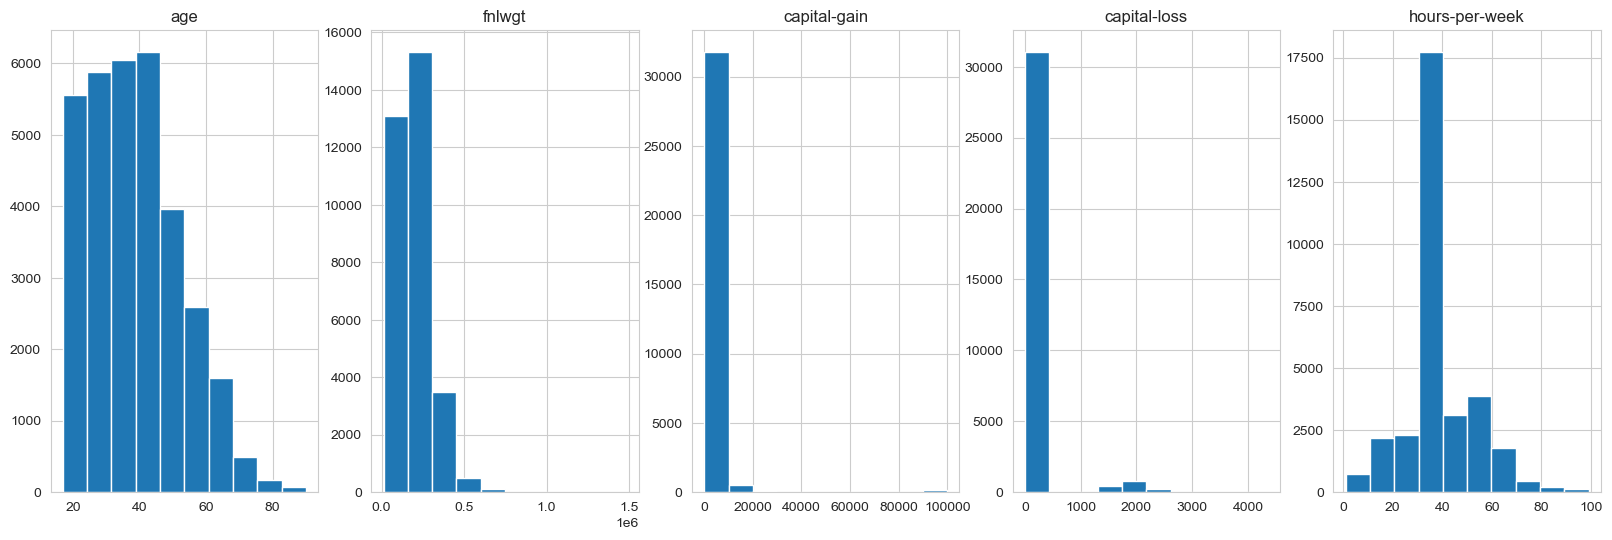

In [39]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(20,6))

ax1.hist(df['age'])
ax1.set_title('age')

ax2.hist(df['fnlwgt'])
ax2.set_title('fnlwgt')

ax3.hist(df['capital-gain'])
ax3.set_title('capital-gain')

ax4.hist(df['capital-loss'])
ax4.set_title('capital-loss')

ax5.hist(df['hours-per-week'])
ax5.set_title('hours-per-week')
plt.show()

In [40]:
age_zscore= zscore(df['age'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(age_zscore>threshold)[0])))
    print('--------------')


Threshold Value: 1
Number of Outliers: 5386
--------------
Threshold Value: 2
Number of Outliers: 1157
--------------
Threshold Value: 3
Number of Outliers: 120
--------------


In [41]:
df[age_zscore>1].age.min()

53

In [42]:
df[df['age']<53].age.max()

52

In [43]:
age_win_percentile=stats.percentileofscore(df['age'],52)/100
print(age_win_percentile)

0.8271352613947198


In [44]:
1-age_win_percentile

0.17286473860528018

In [45]:
age_win=winsorize(df.age,(0, (1-age_win_percentile)))

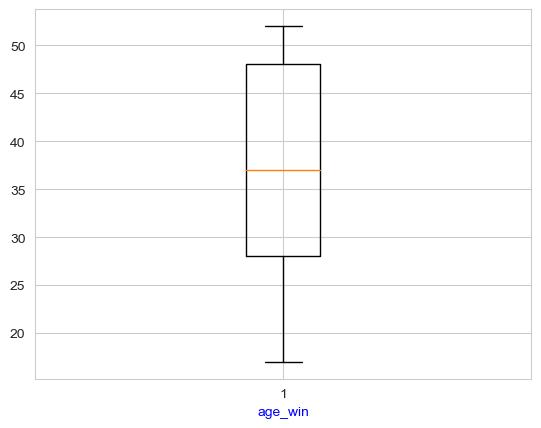

In [46]:
plt.boxplot(age_win)
plt.xlabel('age_win',color='b')
plt.show()

In [47]:
df['age_win']=age_win

In [48]:
def iqr(df,var):
    q1=np.quantile(df[var], 0.25)
    q3=np.quantile(df[var],0.75)
    diff=q3-q1
    lower_v=q1-(1.5*diff)
    upper_v=q3+(1.5*diff)
    return df[(df[var]<lower_v) | (df[var]>upper_v)]

In [49]:
fnlwgt_out = iqr(df, 'fnlwgt')
fnlwgt_out

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,age_win
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K,19
40,31,Private,507875,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,43,United-States,<=50K,31
80,18,Private,446839,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,0,30,United-States,<=50K,18
110,24,Private,432376,Bachelors,13,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,<=50K,24
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,<=50K,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32306,24,Private,427686,1st-4th,2,Married-civ-spouse,Handlers-cleaners,Other-relative,White,Male,0,0,40,Mexico,<=50K,24
32329,28,Private,435842,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,28
32470,50,Private,485710,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K,50
32496,18,Private,436163,11th,7,Never-married,Prof-specialty,Own-child,White,Male,0,0,20,United-States,<=50K,18


In [50]:
fnlwgt_out.fnlwgt.min()

415847

In [51]:
df[df['fnlwgt']< 415847].fnlwgt.max()

415706

In [52]:
fnlwgt_win_percentile = stats.percentileofscore(df['fnlwgt'], 415706)/100
print(fnlwgt_win_percentile)

0.9694808986692074


In [53]:
1-fnlwgt_win_percentile

0.03051910133079261

In [54]:
fnlwgt_win = winsorize(df.fnlwgt,(0, (1-fnlwgt_win_percentile)))

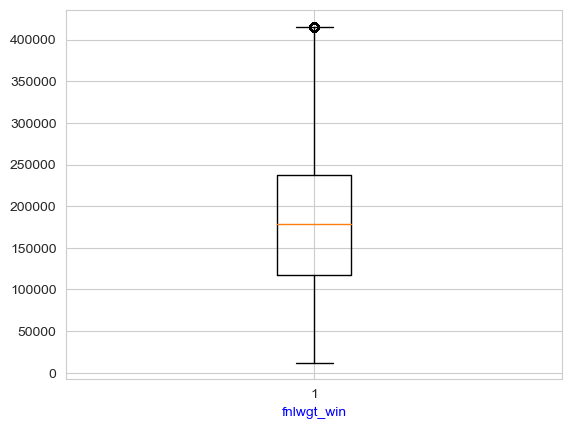

In [55]:
plt.boxplot(fnlwgt_win)
plt.xlabel('fnlwgt_win',color='b')
plt.show()

In [56]:
df['fnlwgt_win']=fnlwgt_win

In [57]:
capital_gain_out=iqr(df, 'capital-gain')

In [58]:
capital_gain_out['capital-gain'].min()

114

In [59]:
df[df['capital-gain']<114]['capital-gain'].max()

0

In [60]:
capital_gain_win_percentile = stats.percentileofscore(df['capital-gain'], 0)/100
print(capital_gain_win_percentile)

0.4583397363002121


In [61]:
1-capital_gain_win_percentile

0.5416602636997879

In [62]:
capital_gain_win = winsorize(df['capital-gain'], (0, (1-capital_gain_win_percentile)))

In [63]:
capital_gain_win

masked_array(data=[0, 0, 0, ..., 0, 0, 0],
             mask=False,
       fill_value=999999,
            dtype=int64)

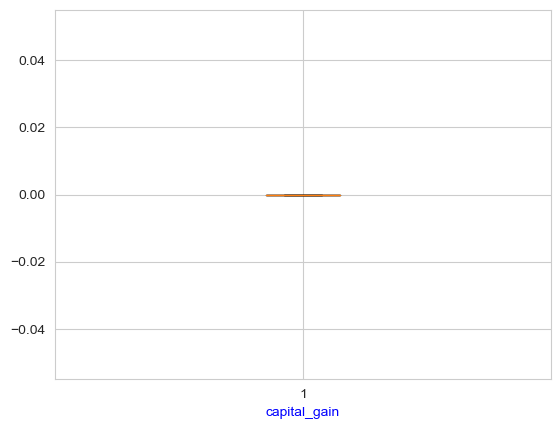

In [64]:
plt.boxplot(capital_gain_win)
plt.xlabel('capital_gain',color='b')
plt.show()

In [65]:
df['capital_gain_win'] = capital_gain_win

In [66]:
capital_loss_out = iqr(df, 'capital-loss')
capital_loss_out

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,age_win,fnlwgt_win,capital_gain_win
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K,43,117037,0
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K,45,386940,0
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K,47,51835,0
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,others_3,<=50K,30,117747,0
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K,48,191277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32441,53,Private,304504,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,45,United-States,>50K,52,304504,0
32443,18,Private,41381,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,1602,20,United-States,<=50K,18,41381,0
32445,61,Private,190682,HS-grad,9,Widowed,Craft-repair,Not-in-family,Black,Female,0,1669,50,United-States,<=50K,52,190682,0
32458,36,Private,237943,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,45,United-States,>50K,36,237943,0


In [67]:
capital_loss_out['capital-loss'].min()

155

In [68]:
df[df['capital-loss']<155]['capital-loss'].max()

0

In [69]:
capital_loss_percentile = stats.percentileofscore(df['capital-loss'], 0)/100
print(capital_loss_percentile)

0.47667271106740017


In [70]:
1-capital_loss_percentile

0.5233272889325998

In [71]:
capital_loss_win = winsorize(df['capital-loss'], (0, (1-capital_loss_percentile)))

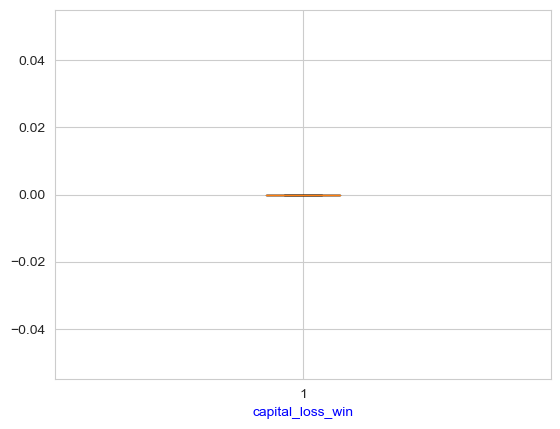

In [72]:
plt.boxplot(capital_loss_win)
plt.xlabel('capital_loss_win',color='b')
plt.show()

In [73]:
df['capital_loss_win'] = capital_loss_win

In [74]:
hours_per_week_zscore= zscore(df['hours-per-week'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(hours_per_week_zscore>threshold)[0])))
    print('--------------')


Threshold Value: 1
Number of Outliers: 3491
--------------
Threshold Value: 2
Number of Outliers: 822
--------------
Threshold Value: 3
Number of Outliers: 349
--------------


In [75]:
df[df['hours-per-week']>1]['hours-per-week'].min()

2

In [76]:
df[df['hours-per-week']<2]['hours-per-week'].max()

1

In [77]:
hours_per_week_percentile = stats.percentileofscore(df['hours-per-week'], 1)/100
print(hours_per_week_percentile)

0.00032270953068813966


In [78]:
1-hours_per_week_percentile

0.9996772904693119

In [79]:
hours_per_week_win = winsorize(df['hours-per-week'], (0, (1-hours_per_week_percentile)))

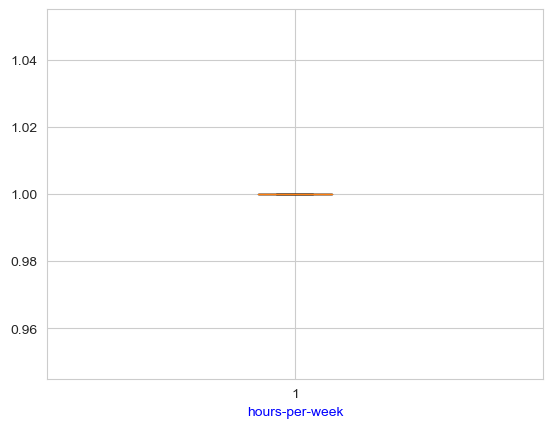

In [80]:
plt.boxplot(hours_per_week_win)
plt.xlabel('hours-per-week',color='b')
plt.show()

In [81]:
df['hours_per_week_win'] = hours_per_week_win

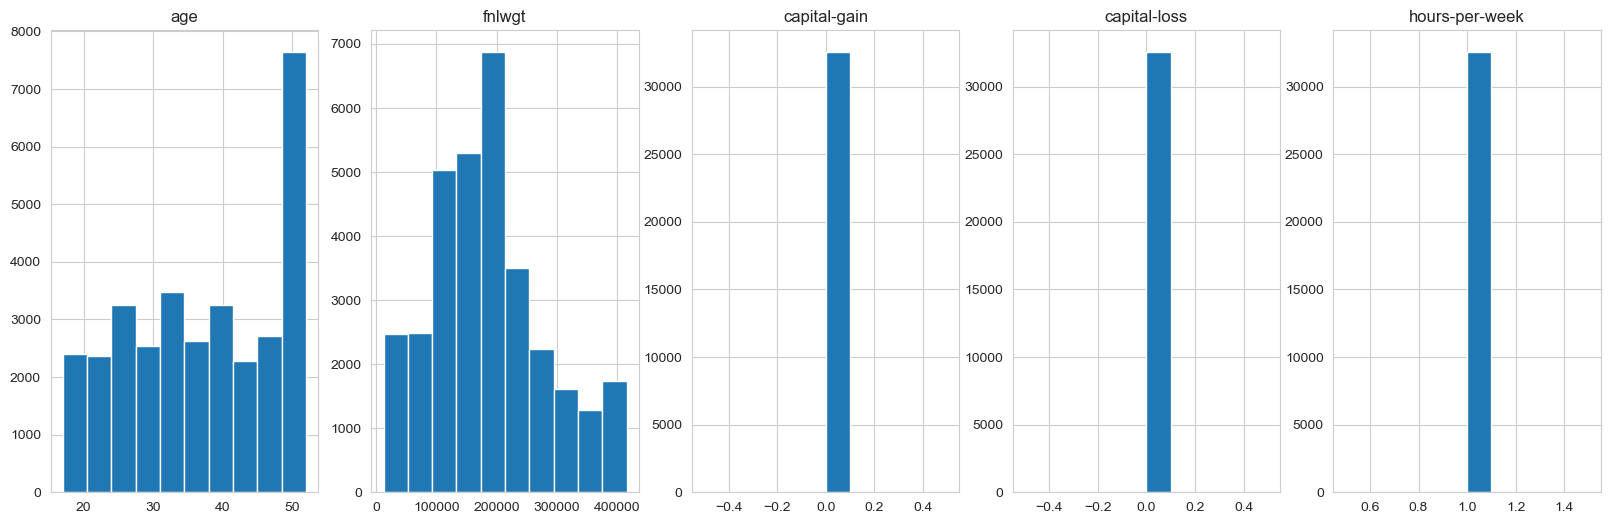

In [82]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(20,6))

ax1.hist(df['age_win'])
ax1.set_title('age')

ax2.hist(df['fnlwgt_win'])
ax2.set_title('fnlwgt')

ax3.hist(df['capital_gain_win'])
ax3.set_title('capital-gain')

ax4.hist(df['capital_loss_win'])
ax4.set_title('capital-loss')

ax5.hist(df['hours_per_week_win'])
ax5.set_title('hours-per-week')
plt.show()

- now, we have taken care of the outliers, let's check for skew

In [83]:
df_copy = df.copy()

In [84]:
df_copy[['age_win', 'fnlwgt_win', 'capital_gain_win', 'capital_loss_win', 'hours_per_week_win']].agg(['skew']).transpose()

,skew
age_win,-0.089824
fnlwgt_win,0.548509
capital_gain_win,0.000000
capital_loss_win,0.000000
hours_per_week_win,0.000000


In [85]:
#transformation on unsymmetrical data
df_copy['fnlwgt_win_log'] = np.log(df_copy['fnlwgt_win'])
df_copy['fnlwgt_win_sqrt'] = np.sqrt(df_copy['fnlwgt_win'])

In [86]:
df_copy

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,hours-per-week,native-country,salary,age_win,fnlwgt_win,capital_gain_win,capital_loss_win,hours_per_week_win,fnlwgt_win_log,fnlwgt_win_sqrt
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,<=50K,39,77516,0,0,1,11.258240,278.416954
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,<=50K,50,83311,0,0,1,11.330336,288.636450
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,<=50K,38,215646,0,0,1,12.281393,464.377002
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,<=50K,52,234721,0,0,1,12.366153,484.480134
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,<=50K,28,338409,0,0,1,12.732011,581.729318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,38,United-States,<=50K,27,257302,0,0,1,12.458006,507.249446
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,40,United-States,>50K,40,154374,0,0,1,11.947134,392.904569
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,40,United-States,<=50K,52,151910,0,0,1,11.931044,389.756334
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,20,United-States,<=50K,22,201490,0,0,1,12.213495,448.876375


In [87]:
df_copy[['fnlwgt_win_log', 'fnlwgt_win', 'fnlwgt_win_sqrt']].agg(['skew']).transpose()

,skew
fnlwgt_win_log,-0.955705
fnlwgt_win,0.548509
fnlwgt_win_sqrt,-0.133035


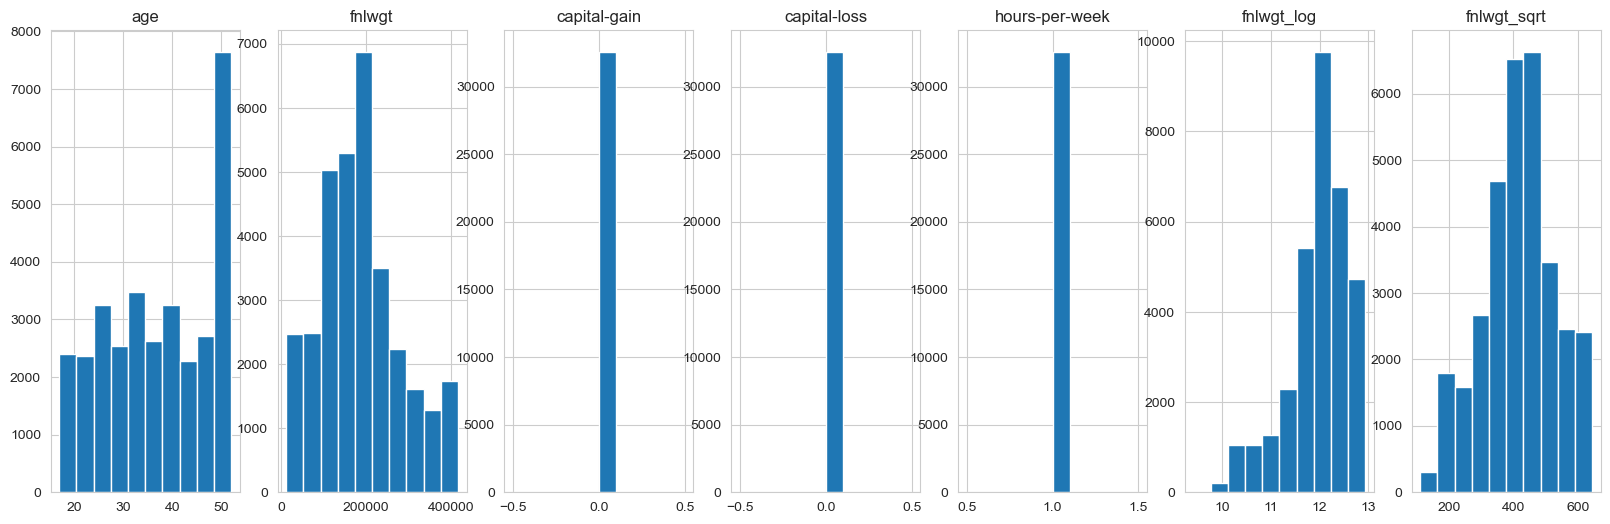

In [88]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7, figsize=(20,6))

ax1.hist(df_copy['age_win'])
ax1.set_title('age')

ax2.hist(df_copy['fnlwgt_win'])
ax2.set_title('fnlwgt')

ax3.hist(df_copy['capital_gain_win'])
ax3.set_title('capital-gain')

ax4.hist(df_copy['capital_loss_win'])
ax4.set_title('capital-loss')

ax5.hist(df_copy['hours_per_week_win'])
ax5.set_title('hours-per-week')

ax6.hist(df_copy['fnlwgt_win_log'])
ax6.set_title('fnlwgt_log')

ax7.hist(df_copy['fnlwgt_win_sqrt'])
ax7.set_title('fnlwgt_sqrt')
plt.show()

In [89]:
df_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,hours-per-week,native-country,salary,age_win,fnlwgt_win,capital_gain_win,capital_loss_win,hours_per_week_win,fnlwgt_win_log,fnlwgt_win_sqrt
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,<=50K,39,77516,0,0,1,11.258240,278.416954
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,<=50K,50,83311,0,0,1,11.330336,288.636450
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,<=50K,38,215646,0,0,1,12.281393,464.377002
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,<=50K,52,234721,0,0,1,12.366153,484.480134
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,<=50K,28,338409,0,0,1,12.732011,581.729318


In [90]:
df_copy.drop(['fnlwgt_win', 'fnlwgt', 'age', 'capital-gain', 'capital-loss', 'fnlwgt_win_log', 'hours-per-week'],axis=1,inplace=True)

- we have deallt with the numerical outliers fully, moving to categorical features

In [91]:
df_copy.head()

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,salary,age_win,capital_gain_win,capital_loss_win,hours_per_week_win,fnlwgt_win_sqrt
0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,39,0,0,1,278.416954
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,50,0,0,1,288.636450
2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,38,0,0,1,464.377002
3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,52,0,0,1,484.480134
4,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,28,0,0,1,581.729318


In [92]:
categorical_df_copy=categorical_df.copy()

In [93]:
categorical_df_copy.columns

Index(['workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country',
       'salary'],
      dtype='object')

In [94]:
# Checking for their unique values and value count to know my dataset
unique_number=[]
for i in categorical_df_copy.columns:
    x=df[i].value_counts().count()
    unique_number.append(x)
pd.DataFrame(unique_number,columns=['Unique Number'], index=categorical_df_copy.columns)
    

,Unique Number
workclass,9
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2
native-country,42
salary,2


In [95]:
df_copy.salary.value_counts()

salary
<=50K    24698
>50K      7839
Name: count, dtype: int64

In [96]:
df_copy["sex"] = df_copy["sex"].replace({'Male':1,'Female':0})
df_copy["salary"] = df_copy["salary"].replace({'<=50K':1,'>50K':0})

In [97]:
df_copy.head()

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,salary,age_win,capital_gain_win,capital_loss_win,hours_per_week_win,fnlwgt_win_sqrt
0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,United-States,1,39,0,0,1,278.416954
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,United-States,1,50,0,0,1,288.636450
2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,United-States,1,38,0,0,1,464.377002
3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,United-States,1,52,0,0,1,484.480134
4,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,Cuba,1,28,0,0,1,581.729318


In [98]:
df_numerical = df_copy[['education-num', 'sex', 'capital_gain_win', 'age_win', 'capital_loss_win', 'hours_per_week_win', 'fnlwgt_win_sqrt']]
df_category = df_copy[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'salary']]


In [99]:
#Transforming category varibales using LabelEncoder

## Label encoding 
encoder = LabelEncoder()

for i in df_category:
    df_category[i] = encoder.fit_transform(df_copy[i])


In [100]:
df_new = pd.concat([df_numerical, df_category], axis=1)
df_new.head()

,education-num,sex,capital_gain_win,age_win,capital_loss_win,hours_per_week_win,fnlwgt_win_sqrt,workclass,education,marital-status,occupation,relationship,race,native-country,salary
0,13,1,0,39,0,1,278.416954,6,9,4,0,1,4,38,1
1,13,1,0,50,0,1,288.636450,5,9,2,3,0,4,38,1
2,9,1,0,38,0,1,464.377002,3,11,0,5,1,4,38,1
3,7,1,0,52,0,1,484.480134,3,1,2,5,0,2,38,1
4,13,0,0,28,0,1,581.729318,3,9,2,9,5,2,4,1


In [101]:
df_new.describe()

,education-num,sex,capital_gain_win,age_win,capital_loss_win,hours_per_week_win,fnlwgt_win_sqrt,workclass,education,marital-status,occupation,relationship,race,native-country,salary
count,32537.000000,32537.000000,32537.0,32537.000000,32537.0,32537.0,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,10.081815,0.669238,0.0,37.095276,0.0,1.0,416.836743,3.376587,10.297507,2.611427,6.422504,1.446538,3.665827,36.439807,0.759074
std,2.571633,0.470495,0.0,11.057657,0.0,0.0,114.349016,1.582564,3.870142,1.506301,4.329257,1.607064,0.848847,6.156013,0.427652
min,1.000000,0.000000,0.0,17.000000,0.0,1.0,110.837719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.0,28.000000,0.0,1.0,343.259377,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,38.000000,1.000000
50%,10.000000,1.000000,0.0,37.000000,0.0,1.0,422.322152,3.000000,11.000000,2.000000,6.000000,1.000000,4.000000,38.000000,1.000000
75%,12.000000,1.000000,0.0,48.000000,0.0,1.0,486.819268,3.000000,12.000000,4.000000,10.000000,3.000000,4.000000,38.000000,1.000000
max,16.000000,1.000000,0.0,52.000000,0.0,1.0,644.862001,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,41.000000,1.000000


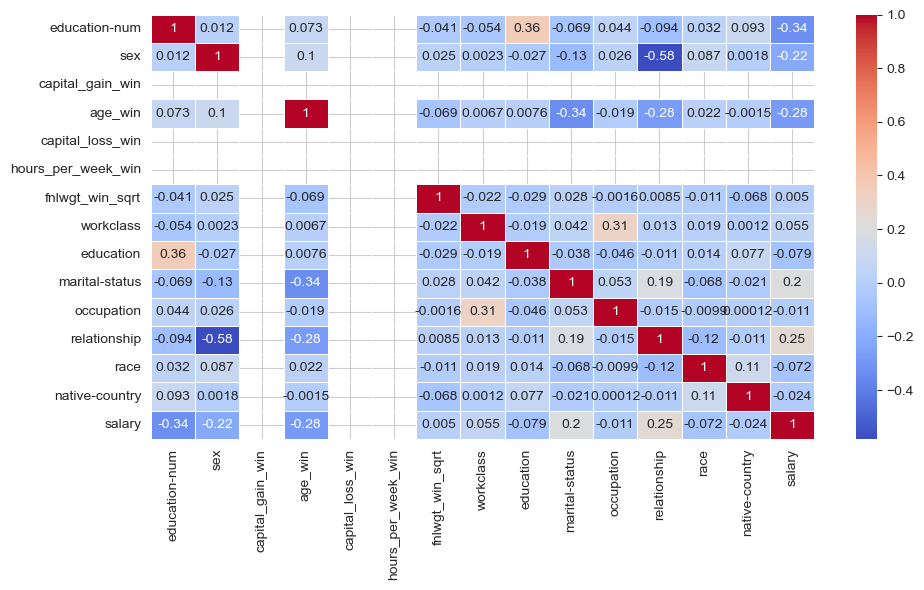

In [102]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(), lw=0.5, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [103]:
df_new.head()

,education-num,sex,capital_gain_win,age_win,capital_loss_win,hours_per_week_win,fnlwgt_win_sqrt,workclass,education,marital-status,occupation,relationship,race,native-country,salary
0,13,1,0,39,0,1,278.416954,6,9,4,0,1,4,38,1
1,13,1,0,50,0,1,288.636450,5,9,2,3,0,4,38,1
2,9,1,0,38,0,1,464.377002,3,11,0,5,1,4,38,1
3,7,1,0,52,0,1,484.480134,3,1,2,5,0,2,38,1
4,13,0,0,28,0,1,581.729318,3,9,2,9,5,2,4,1


In [104]:
scaler = StandardScaler()

df_new['marital-status'] = scaler.fit_transform(df_new[['marital-status']])
df_new['fnlwgt_win_sqrt'] = scaler.fit_transform(df_new[['fnlwgt_win_sqrt']])
df_new['relationship'] = scaler.fit_transform(df_new[['relationship']])
df_new['workclass'] = scaler.fit_transform(df_new[['workclass']])
df_new['age_win'] = scaler.fit_transform(df_new[['age_win']])
df_new['education'] = scaler.fit_transform(df_new[['education']])
df_new['occupation'] = scaler.fit_transform(df_new[['occupation']])
df_new['education-num'] = scaler.fit_transform(df_new[['education-num']])
df_new['race'] = scaler.fit_transform(df_new[['race']])
df_new['native-country'] = scaler.fit_transform(df_new[['native-country']])
df_new['hours_per_week_win'] = scaler.fit_transform(df_new[['hours_per_week_win']])

In [105]:
df_new.head()

,education-num,sex,capital_gain_win,age_win,capital_loss_win,hours_per_week_win,fnlwgt_win_sqrt,workclass,education,marital-status,occupation,relationship,race,native-country,salary
0,1.134777,1,0,0.172256,0,0.0,-1.210521,1.657724,-0.335266,0.921857,-1.483535,-0.277864,0.393685,0.253446,1
1,1.134777,1,0,1.167058,0,0.0,-1.121149,1.025828,-0.335266,-0.405919,-0.790564,-0.900126,0.393685,0.253446,1
2,-0.420679,1,0,0.081820,0,0.0,0.415753,-0.237964,0.181519,-1.733696,-0.328584,-0.277864,0.393685,0.253446,1
3,-1.198407,1,0,1.347930,0,0.0,0.591561,-0.237964,-2.402406,-0.405919,-0.328584,-0.900126,-1.962488,0.253446,1
4,1.134777,0,0,-0.822545,0,0.0,1.442033,-0.237964,-0.335266,-0.405919,0.595376,2.211186,-1.962488,-5.269694,1


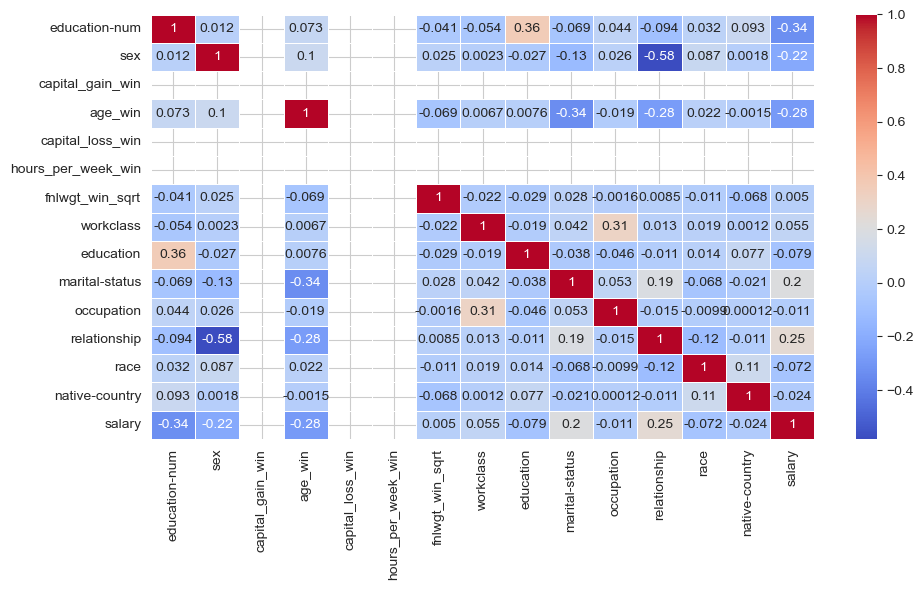

In [106]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(), lw=0.5, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [107]:
df_new.drop(['occupation', 'capital_loss_win', 'capital_gain_win', 'fnlwgt_win_sqrt', 'marital-status', 'race', 'native-country'], axis=1, inplace=True)

In [108]:
df_new.shape

(32537, 8)

## Modeling

In [109]:
#Split the data into X and y

X = df_new.drop(['salary'], axis=1)
y = df_new['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
y_test.shape

(6508,)

## RidgeClassifier

In [111]:
#make a seed
np.random.seed(42)

#Instantiating Ridge Classifier
ridge_model = RidgeClassifier()
print("Model name = ", ridge_model)
#fit model to data
ridge_model.fit(X_train, y_train)

#evaluate the model
print("Model score =", ridge_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = ridge_model.predict(X_test)

#Intercept of the model
print("Model Intercept =", ridge_model.intercept_)

#Evaluation metrics
accuracy_score1 = accuracy_score(y_test, y_pred)
recall_score1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)

print('accuracy score:', accuracy_score1)  
print('recall score:', recall_score1)  
print('f1 score:', f1_score1)
print('precision:', precision1)

Model name =  RidgeClassifier()
Model score = 0.800860479409957
Model Intercept = [0.69684749]
accuracy score: 0.800860479409957
recall score: 0.9563710499490315
f1 score: 0.8786289567334706
precision: 0.8125757838212367


## Logistic Regressor

In [112]:
#make a seed
np.random.seed(42)

#Instantiating Logistic Regressor
lr_model = LogisticRegression()
print("Model name = ", lr_model)
#fit model to data
lr_model.fit(X_train, y_train)

#evaluate the model
print("Model score =", lr_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = lr_model.predict(X_test)

#Intercept of the model
print("Model Intercept =", lr_model.intercept_)

#Evaluation metrics
accuracy_score2 = accuracy_score(y_test, y_pred)
recall_score2 = recall_score(y_test, y_pred)
f1_score2 = f1_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)

print('accuracy score:', accuracy_score2)  
print('recall score:', recall_score2)  
print('f1 score:', f1_score2)
print('precision:', precision2)

Model name =  LogisticRegression()
Model score = 0.8010141364474493
Model Intercept = [2.29620154]
accuracy score: 0.8010141364474493
recall score: 0.9380224260958205
f1 score: 0.8766314185005238
precision: 0.8227825464949928


## RandomForest Classifier

In [113]:
#make a seed
np.random.seed(42)

#Instantiating
rand_model = RandomForestClassifier()
print("Model name = ", rand_model)
#fit model to data
rand_model.fit(X_train, y_train)

#evaluate the model
print("Model score =", rand_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = rand_model.predict(X_test)


#Evaluation metrics
accuracy_score3 = accuracy_score(y_test, y_pred)
recall_score3 = recall_score(y_test, y_pred)
f1_score3 = f1_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred)

print('accuracy score:', accuracy_score3)  
print('recall score:', recall_score3)  
print('f1 score:', f1_score3)
print('precision:', precision3)

Model name =  RandomForestClassifier()
Model score = 0.8157652120467117
accuracy score: 0.8157652120467117
recall score: 0.9037716615698267
f1 score: 0.8808743169398907
precision: 0.859108527131783


In [114]:
#make a seed
np.random.seed(42)

#Instantiating
svc_model = SVC()
print("Model name = ", svc_model)
#fit model to data
svc_model.fit(X_train, y_train)

#evaluate the model
print("Model score =", svc_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = svc_model.predict(X_test)


#Evaluation metrics
accuracy_score4 = accuracy_score(y_test, y_pred)
recall_score4 = recall_score(y_test, y_pred)
f1_score4 = f1_score(y_test, y_pred)
precision4 = precision_score(y_test, y_pred)

print('accuracy score:', accuracy_score4)  
print('recall score:', recall_score4)  
print('f1 score:', f1_score4)
print('precision:', precision4)

Model name =  SVC()
Model score = 0.8211432083589428
accuracy score: 0.8211432083589428
recall score: 0.9355759429153925
f1 score: 0.8874492361245407
precision: 0.8440316350928821


In [115]:
#make a seed
np.random.seed(42)

#Instantiating
xgb_model = XGBClassifier()
print("Model name = ", xgb_model)
#fit model to data
xgb_model.fit(X_train, y_train)

#evaluate the model
print("Model score =", xgb_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = xgb_model.predict(X_test)


#Evaluation metrics
accuracy_score5 = accuracy_score(y_test, y_pred)
recall_score5 = recall_score(y_test, y_pred)
f1_score5 = f1_score(y_test, y_pred)
precision5 = precision_score(y_test, y_pred)

print('accuracy score:', accuracy_score5)  
print('recall score:', recall_score5)  
print('f1 score:', f1_score5)
print('precision:', precision5)

Model name =  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Model score = 0.8271358328211432
accuracy score: 0.8271358328211432
recall score: 0.9137614678899083
f1 score: 0.888492417484389
precision: 0.8645833333333334


In [116]:
#make a seed
np.random.seed(42)

#Instantiating
lgbm_model = LGBMClassifier()
print("Model name = ", lgbm_model)
#fit model to data
lgbm_model.fit(X_train, y_train)

#evaluate the model
print("Model score =", lgbm_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = lgbm_model.predict(X_test)


#Evaluation metrics
accuracy_score6 = accuracy_score(y_test, y_pred)
recall_score6 = recall_score(y_test, y_pred)
f1_score6 = f1_score(y_test, y_pred)
precision6 = precision_score(y_test, y_pred)

print('accuracy score:', accuracy_score6)  
print('recall score:', recall_score6)  
print('f1 score:', f1_score6)
print('precision:', precision6)

Model name =  LGBMClassifier()
[LightGBM] [Info] Number of positive: 19793, number of negative: 6236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 26029, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.760421 -> initscore=1.154989
[LightGBM] [Info] Start training from score 1.154989
Model score = 0.828518746158574
accuracy score: 0.828518746158574
recall score: 0.9072375127420998
f1 score: 0.8885782747603833
precision: 0.8706711015456857


In [117]:
#make a seed
np.random.seed(42)

#Instantiating
cat_model = CatBoostClassifier()
print("Model name = ", cat_model)
#fit model to data
cat_model.fit(X_train, y_train)

#evaluate the model
print("Model score =", cat_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = cat_model.predict(X_test)


#Evaluation metrics
accuracy_score7 = accuracy_score(y_test, y_pred)
recall_score7 = recall_score(y_test, y_pred)
f1_score7 = f1_score(y_test, y_pred)
precision7 = precision_score(y_test, y_pred)

print('accuracy score:', accuracy_score7)  
print('recall score:', recall_score7)  
print('f1 score:', f1_score7)
print('precision:', precision7)

Model name =  <catboost.core.CatBoostClassifier object at 0x000001994DD15850>
Learning rate set to 0.041432
0:	learn: 0.6560709	total: 154ms	remaining: 2m 33s
1:	learn: 0.6231493	total: 173ms	remaining: 1m 26s
2:	learn: 0.5943295	total: 192ms	remaining: 1m 3s
3:	learn: 0.5687580	total: 204ms	remaining: 50.9s
4:	learn: 0.5463246	total: 216ms	remaining: 43.1s
5:	learn: 0.5290455	total: 228ms	remaining: 37.8s
6:	learn: 0.5113984	total: 240ms	remaining: 34s
7:	learn: 0.4961011	total: 252ms	remaining: 31.2s
8:	learn: 0.4826998	total: 264ms	remaining: 29s
9:	learn: 0.4700782	total: 276ms	remaining: 27.3s
10:	learn: 0.4595245	total: 288ms	remaining: 25.9s
11:	learn: 0.4503307	total: 300ms	remaining: 24.7s
12:	learn: 0.4418634	total: 312ms	remaining: 23.7s
13:	learn: 0.4351975	total: 323ms	remaining: 22.8s
14:	learn: 0.4284775	total: 335ms	remaining: 22s
15:	learn: 0.4222665	total: 347ms	remaining: 21.3s
16:	learn: 0.4178677	total: 358ms	remaining: 20.7s
17:	learn: 0.4135916	total: 374ms	remai

163:	learn: 0.3525390	total: 2.31s	remaining: 11.8s
164:	learn: 0.3524911	total: 2.32s	remaining: 11.8s
165:	learn: 0.3524440	total: 2.34s	remaining: 11.8s
166:	learn: 0.3523935	total: 2.35s	remaining: 11.7s
167:	learn: 0.3523427	total: 2.37s	remaining: 11.7s
168:	learn: 0.3522966	total: 2.38s	remaining: 11.7s
169:	learn: 0.3522398	total: 2.39s	remaining: 11.7s
170:	learn: 0.3521644	total: 2.4s	remaining: 11.6s
171:	learn: 0.3521269	total: 2.41s	remaining: 11.6s
172:	learn: 0.3520915	total: 2.43s	remaining: 11.6s
173:	learn: 0.3520799	total: 2.44s	remaining: 11.6s
174:	learn: 0.3520594	total: 2.45s	remaining: 11.5s
175:	learn: 0.3520169	total: 2.46s	remaining: 11.5s
176:	learn: 0.3519908	total: 2.47s	remaining: 11.5s
177:	learn: 0.3519517	total: 2.48s	remaining: 11.5s
178:	learn: 0.3519197	total: 2.5s	remaining: 11.4s
179:	learn: 0.3518801	total: 2.51s	remaining: 11.4s
180:	learn: 0.3518429	total: 2.53s	remaining: 11.5s
181:	learn: 0.3517925	total: 2.54s	remaining: 11.4s
182:	learn: 0.

333:	learn: 0.3458249	total: 4.43s	remaining: 8.84s
334:	learn: 0.3458038	total: 4.45s	remaining: 8.84s
335:	learn: 0.3457730	total: 4.47s	remaining: 8.82s
336:	learn: 0.3457298	total: 4.48s	remaining: 8.81s
337:	learn: 0.3456972	total: 4.49s	remaining: 8.8s
338:	learn: 0.3456584	total: 4.5s	remaining: 8.78s
339:	learn: 0.3456199	total: 4.51s	remaining: 8.76s
340:	learn: 0.3455871	total: 4.53s	remaining: 8.75s
341:	learn: 0.3455524	total: 4.54s	remaining: 8.73s
342:	learn: 0.3455217	total: 4.55s	remaining: 8.72s
343:	learn: 0.3454872	total: 4.56s	remaining: 8.7s
344:	learn: 0.3454591	total: 4.58s	remaining: 8.69s
345:	learn: 0.3454222	total: 4.59s	remaining: 8.67s
346:	learn: 0.3453798	total: 4.6s	remaining: 8.66s
347:	learn: 0.3453531	total: 4.61s	remaining: 8.64s
348:	learn: 0.3453059	total: 4.62s	remaining: 8.63s
349:	learn: 0.3452669	total: 4.64s	remaining: 8.62s
350:	learn: 0.3452239	total: 4.66s	remaining: 8.61s
351:	learn: 0.3451819	total: 4.67s	remaining: 8.6s
352:	learn: 0.345

500:	learn: 0.3408595	total: 6.52s	remaining: 6.5s
501:	learn: 0.3408360	total: 6.54s	remaining: 6.49s
502:	learn: 0.3408260	total: 6.55s	remaining: 6.48s
503:	learn: 0.3408142	total: 6.57s	remaining: 6.46s
504:	learn: 0.3407890	total: 6.58s	remaining: 6.45s
505:	learn: 0.3407461	total: 6.59s	remaining: 6.43s
506:	learn: 0.3407295	total: 6.6s	remaining: 6.42s
507:	learn: 0.3406928	total: 6.61s	remaining: 6.41s
508:	learn: 0.3406608	total: 6.63s	remaining: 6.39s
509:	learn: 0.3406270	total: 6.64s	remaining: 6.38s
510:	learn: 0.3406055	total: 6.65s	remaining: 6.36s
511:	learn: 0.3405828	total: 6.66s	remaining: 6.35s
512:	learn: 0.3405617	total: 6.67s	remaining: 6.34s
513:	learn: 0.3405402	total: 6.68s	remaining: 6.32s
514:	learn: 0.3405203	total: 6.7s	remaining: 6.31s
515:	learn: 0.3404820	total: 6.71s	remaining: 6.29s
516:	learn: 0.3404577	total: 6.72s	remaining: 6.28s
517:	learn: 0.3404286	total: 6.73s	remaining: 6.26s
518:	learn: 0.3404001	total: 6.75s	remaining: 6.25s
519:	learn: 0.3

671:	learn: 0.3370994	total: 8.64s	remaining: 4.22s
672:	learn: 0.3370766	total: 8.66s	remaining: 4.21s
673:	learn: 0.3370572	total: 8.68s	remaining: 4.2s
674:	learn: 0.3370354	total: 8.69s	remaining: 4.18s
675:	learn: 0.3370091	total: 8.7s	remaining: 4.17s
676:	learn: 0.3369959	total: 8.71s	remaining: 4.16s
677:	learn: 0.3369744	total: 8.73s	remaining: 4.14s
678:	learn: 0.3369657	total: 8.74s	remaining: 4.13s
679:	learn: 0.3369424	total: 8.75s	remaining: 4.12s
680:	learn: 0.3369209	total: 8.76s	remaining: 4.11s
681:	learn: 0.3368988	total: 8.78s	remaining: 4.09s
682:	learn: 0.3368940	total: 8.79s	remaining: 4.08s
683:	learn: 0.3368726	total: 8.8s	remaining: 4.06s
684:	learn: 0.3368512	total: 8.81s	remaining: 4.05s
685:	learn: 0.3368377	total: 8.82s	remaining: 4.04s
686:	learn: 0.3368185	total: 8.83s	remaining: 4.02s
687:	learn: 0.3367933	total: 8.85s	remaining: 4.01s
688:	learn: 0.3367738	total: 8.86s	remaining: 4s
689:	learn: 0.3367655	total: 8.88s	remaining: 3.99s
690:	learn: 0.3367

844:	learn: 0.3341455	total: 10.8s	remaining: 1.98s
845:	learn: 0.3341318	total: 10.8s	remaining: 1.97s
846:	learn: 0.3341131	total: 10.8s	remaining: 1.95s
847:	learn: 0.3341070	total: 10.8s	remaining: 1.94s
848:	learn: 0.3340947	total: 10.8s	remaining: 1.93s
849:	learn: 0.3340799	total: 10.9s	remaining: 1.92s
850:	learn: 0.3340689	total: 10.9s	remaining: 1.9s
851:	learn: 0.3340513	total: 10.9s	remaining: 1.89s
852:	learn: 0.3340389	total: 10.9s	remaining: 1.88s
853:	learn: 0.3340226	total: 10.9s	remaining: 1.86s
854:	learn: 0.3340136	total: 10.9s	remaining: 1.85s
855:	learn: 0.3339984	total: 10.9s	remaining: 1.84s
856:	learn: 0.3339834	total: 10.9s	remaining: 1.82s
857:	learn: 0.3339744	total: 10.9s	remaining: 1.81s
858:	learn: 0.3339503	total: 11s	remaining: 1.8s
859:	learn: 0.3339278	total: 11s	remaining: 1.78s
860:	learn: 0.3339117	total: 11s	remaining: 1.77s
861:	learn: 0.3338977	total: 11s	remaining: 1.76s
862:	learn: 0.3338737	total: 11s	remaining: 1.75s
863:	learn: 0.3338661	to

In [118]:
models = ["Ridge Classifier", "Logistic Regression", "Random Forest Classifier", "SVC", "XGBClassifier", "LGBM Classifier", "CatBoostClassifier"]

accuracy_score = [accuracy_score1, accuracy_score2, accuracy_score3, accuracy_score4, accuracy_score5, accuracy_score6, accuracy_score7]
recall_score = [recall_score1, recall_score2, recall_score3, recall_score4, recall_score5, recall_score6, recall_score7]
f1_score= [f1_score1, f1_score2, f1_score3, f1_score4, f1_score5, f1_score6, f1_score7]
precision = [precision1, precision2, precision3, precision4, precision5, precision6, precision7]


# Creating a dataframe
df1= pd.DataFrame({
    'Model': models,
    'accuracy_score': accuracy_score,
    'recall_score': recall_score,
    'f1_score': f1_score,
    'precision': precision})

In [119]:
df1.sort_values(by="accuracy_score", ascending=False).reset_index(drop=True)

,Model,accuracy_score,recall_score,f1_score,precision
0,CatBoostClassifier,0.828672,0.914577,0.889462,0.865689
1,LGBM Classifier,0.828519,0.907238,0.888578,0.870671
2,XGBClassifier,0.827136,0.913761,0.888492,0.864583
3,SVC,0.821143,0.935576,0.887449,0.844032
4,Random Forest Classifier,0.815765,0.903772,0.880874,0.859109
5,Logistic Regression,0.801014,0.938022,0.876631,0.822783
6,Ridge Classifier,0.800860,0.956371,0.878629,0.812576


CatBoostClassifier is doing well. Lets improve our model 

## Hyperparameter with GridSearchCV

In [120]:
param_grid = {'n_estimators': [10, 25, 50, 75, 100], 'max_depth': [16], 'l2_leaf_reg': [4.4,4.7,4.8,4.9,5.0]}
grid = GridSearchCV(CatBoostClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print('Best score of cross validation: {:.2f}'.format(grid.best_score_))
print('Best parameters:', best_params)


0:	learn: 0.6783260	total: 11ms	remaining: 1.09s
1:	learn: 0.6646537	total: 31.5ms	remaining: 1.54s
2:	learn: 0.6523852	total: 339ms	remaining: 11s
3:	learn: 0.6400967	total: 483ms	remaining: 11.6s
4:	learn: 0.6296391	total: 763ms	remaining: 14.5s
5:	learn: 0.6184417	total: 787ms	remaining: 12.3s
6:	learn: 0.6082155	total: 822ms	remaining: 10.9s
7:	learn: 0.5979209	total: 830ms	remaining: 9.55s
8:	learn: 0.5882364	total: 837ms	remaining: 8.46s
9:	learn: 0.5794506	total: 910ms	remaining: 8.19s
10:	learn: 0.5706039	total: 916ms	remaining: 7.41s
11:	learn: 0.5622399	total: 931ms	remaining: 6.83s
12:	learn: 0.5548809	total: 1.01s	remaining: 6.78s
13:	learn: 0.5472867	total: 1.02s	remaining: 6.28s
14:	learn: 0.5400327	total: 1.04s	remaining: 5.89s
15:	learn: 0.5329433	total: 1.04s	remaining: 5.49s
16:	learn: 0.5268836	total: 1.35s	remaining: 6.58s
17:	learn: 0.5208171	total: 1.65s	remaining: 7.52s
18:	learn: 0.5153785	total: 1.92s	remaining: 8.19s
19:	learn: 0.5093041	total: 1.93s	remaining

In [122]:
y_pred = grid.predict(X_test)

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62      1603
           1       0.86      0.93      0.89      4905

    accuracy                           0.83      6508
   macro avg       0.78      0.74      0.76      6508
weighted avg       0.82      0.83      0.83      6508



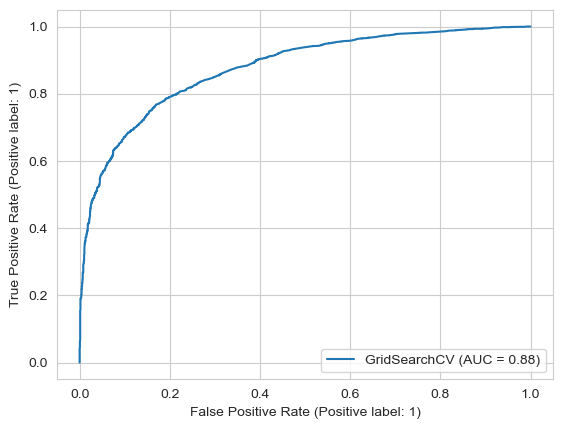

In [130]:
# Plot CatBoost ROC curve 

cat_plot = RocCurveDisplay.from_estimator(grid, X_test, y_test)

In [131]:
preds=pd.DataFrame({'Actual_price':y_test,'Predicted_price':y_pred.astype(int)})
new_df=df.merge(preds,left_index=True,right_index=True)
new_df.sample(20,random_state=42)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,hours-per-week,native-country,salary,age_win,fnlwgt_win,capital_gain_win,capital_loss_win,hours_per_week_win,Actual_price,Predicted_price
16786,22,Private,204935,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,...,40,United-States,<=50K,22,204935,0,0,1,1,1
26859,26,Private,160300,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,...,40,United-States,<=50K,26,160300,0,0,1,1,1
24032,30,Self-emp-not-inc,79303,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,60,United-States,<=50K,30,79303,0,0,1,1,1
16943,36,Private,200360,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,...,40,United-States,<=50K,36,200360,0,0,1,1,1
516,25,Private,267044,Some-college,10,Never-married,Adm-clerical,Not-in-family,Amer-Indian-Eskimo,Female,...,20,United-States,<=50K,25,267044,0,0,1,1,1
16607,40,Private,240504,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,...,45,United-States,>50K,40,240504,0,0,1,0,0
20947,32,Private,30497,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,...,40,United-States,<=50K,32,30497,0,0,1,1,1
27757,46,Self-emp-not-inc,328216,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,45,United-States,>50K,46,328216,0,0,1,0,0
23463,54,Private,104421,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,...,40,United-States,<=50K,52,104421,0,0,1,1,1
14965,22,Private,356567,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Male,...,60,United-States,<=50K,22,356567,0,0,1,1,1
